In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium import plugins
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 12,14

Matplotlib is building the font cache; this may take a moment.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\si

In [2]:
covid_cases = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/Covid cases in India.xlsx')

In [3]:
covid_cases.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [4]:
covid_cases.drop(['S. No.'],axis=1,inplace=True)

In [5]:
covid_cases['Total Cases'] = covid_cases['Total Confirmed cases (Indian National)'] + covid_cases['Total Confirmed cases ( Foreign National )']

In [6]:
total_cases = covid_cases['Total Cases'].sum()
print('Total Number of cases in India till 22nd March 2020: ',total_cases)

Total Number of cases in India till 22nd March 2020:  562


In [7]:
covid_cases.style.background_gradient(cmap = 'YlGn')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [8]:
covid_cases['Total Active'] = covid_cases['Total Cases'] - (covid_cases['Cured'] + covid_cases['Death'])

In [9]:
total_cases = covid_cases['Total Active'].sum()

In [10]:
print('Total number of active cases in India till 22nd March 2020: ',total_cases)

Total number of active cases in India till 22nd March 2020:  512


In [11]:
Total_act_cases = covid_cases.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()

In [12]:
Total_act_cases.style.background_gradient(cmap = 'Blues')

,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [13]:
Indian_Coordinates = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/Indian Coordinates.xlsx')

In [14]:
Indian_Coordinates.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [15]:
merged_data = pd.merge(Indian_Coordinates,covid_cases,on = 'Name of State / UT')

In [16]:
map = folium.Map(location = [20,70],zoom_start = 4,tiles ='Stamenterrain')
map

In [17]:
for lat,lon,value,name in zip(merged_data['Latitude'],merged_data['Longitude'],
                              merged_data['Total Cases'],merged_data['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.7,color='#007849',fill_color='green',
                        popup = ('<strong>State</strong>: '+ str(name).capitalize())).add_to(map)
map            
    

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


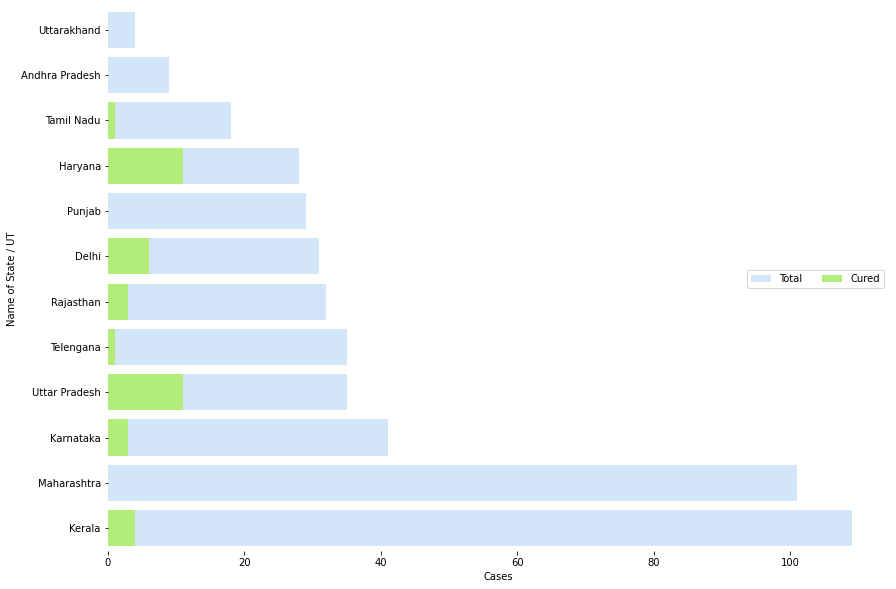

In [18]:
f,ax = plt.subplots(figsize=(14,10))
cured_vs_total = merged_data[['Name of State / UT','Total Cases','Cured','Death']]
cured_vs_total.sort_values('Total Cases',ascending=True,inplace=True)


sns.barplot(x ='Total Cases',y ='Name of State / UT', data = cured_vs_total,label='Total',color = '#CCE5FF')
sns.barplot(x = 'Cured',y='Name of State / UT', data = cured_vs_total,label='Cured',color = '#B2FF66')
ax.legend(ncol=2,loc = 'center right',frameon = True)
ax.set(xlabel='Cases',ylabel='Name of State / UT')
sns.despine(left = True,bottom = True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


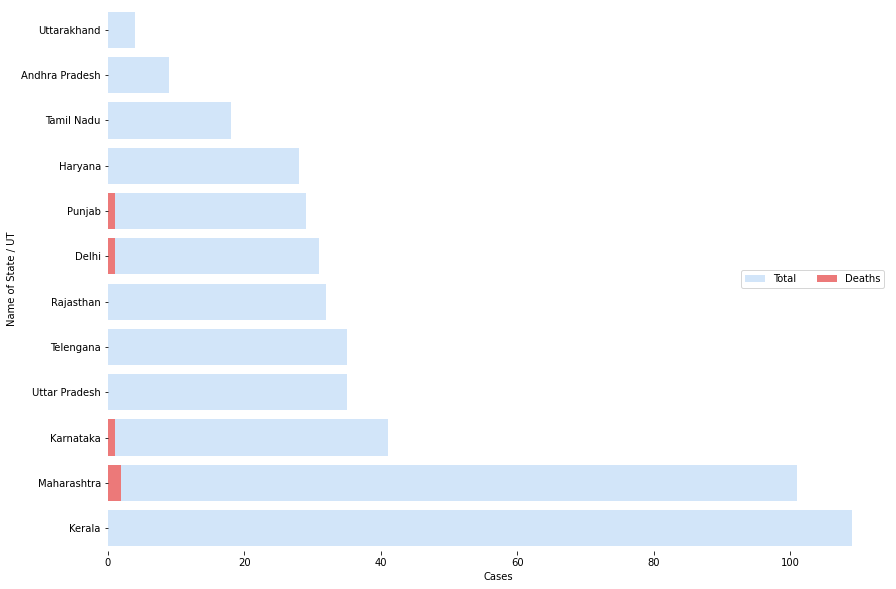

In [19]:
f,ax = plt.subplots(figsize=(14,10))
deaths_vs_total = merged_data[['Name of State / UT','Total Cases','Cured','Death']]
deaths_vs_total.sort_values('Total Cases',ascending=True,inplace=True)


sns.barplot(x ='Total Cases',y ='Name of State / UT', data = cured_vs_total,label='Total',color='#CCE5FF')
sns.barplot(x = 'Death',y='Name of State / UT', data = cured_vs_total,label='Deaths',color = '#FF6666')
ax.legend(ncol=2,loc = 'center right',frameon = True)
ax.set(xlabel='Cases',ylabel='Name of State / UT')
sns.despine(left = True,bottom = True)

In [20]:
per_day_cases = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/per_day_cases.xlsx')

In [21]:
per_day_cases.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [62]:
Scatter = px.scatter(per_day_cases,x = per_day_cases['Date'],y = per_day_cases['Total Cases'])
Scatter.update_layout(title_text = 'Trends of Coronavirus in India ',plot_bgcolor = '#E9ECEF',font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x=0.5)
Scatter.show()

In [23]:
bar = px.bar(per_day_cases,x = per_day_cases['Date'],y = per_day_cases['New Cases'])
bar.update_layout(title_text = 'Trends of Coronavirus in India Day Wise ',plot_bgcolor = '#E9ECEF',font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
bar.show()

In [24]:
perday_India = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/PerDayCases(India).xlsx')

In [25]:
perday_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [26]:
perday_Italy = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/PerDayCases(Italy).xlsx')

In [27]:
perday_Italy.head()


,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


In [28]:
perday_Korea = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/PerDayCases(Korea).xlsx')

In [29]:
perday_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [30]:
perday_Wuhan = pd.read_excel('C:/Users/DELL/Desktop/Minor Project/PerDayCases(Wuhan).xlsx')

In [31]:
perday_Wuhan.head()

,Date,Total Cases,New Cases
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212
4,2020-01-26,1058,297


In [32]:
bar = px.bar(perday_India,x = 'Date',y = 'Total Cases')
bar.update_layout(title_text = 'Situation in India ',plot_bgcolor = '#E9ECEF',
                  font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
bar.show()

In [33]:
bar = px.bar(perday_Italy,x = 'Date',y = 'Total Cases')
bar.update_layout(title_text = 'Situation in Italy ',plot_bgcolor = '#E9ECEF',
                  font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
bar.show()

In [34]:
bar = px.bar(perday_Korea,x = 'Date',y = 'Total Cases')
bar.update_layout(title_text = 'Situation in Korea ',plot_bgcolor = '#E9ECEF',
                  font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
bar.show()

In [35]:
bar = px.bar(perday_Wuhan,x = 'Date',y = 'Total Cases')
bar.update_layout(title_text = 'Situation in Wuhan ',plot_bgcolor = '#E9ECEF',
                  font_color = 'black',font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
bar.show()

In [36]:
after100_India = px.scatter(perday_India,x='Days after surpassing 100 cases',y='Total Cases')
after100_India.update_layout(title_text = 'Situation in India after surpassing 100 cases ',
                             plot_bgcolor = '#E9ECEF',font_color = 'black',
                             font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
after100_India.show()


In [37]:
after100_Italy = px.scatter(perday_Italy,x='Days after surpassing 100 cases',y='Total Cases')
after100_Italy.update_layout(title_text = 'Situation in Italy after surpassing 100 cases ',
                             plot_bgcolor = '#E9ECEF',font_color = 'black',
                             font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
after100_Italy.show()


In [38]:
after100_Korea = px.scatter(perday_Korea,x='Days after surpassing 100 cases',y='Total Cases')
after100_Korea.update_layout(title_text = 'Situation in Korea after surpassing 100 cases ',
                             plot_bgcolor = '#E9ECEF',font_color = 'black',
                             font_family = 'Times New Roman',font_size = 14,title_x = 0.5)
after100_Korea.show()


In [39]:
worldwide_data = pd.read_csv('C:/Users/DELL/Desktop/Minor Project/covid_19_clean_complete.csv',parse_dates = ['Date'])

In [40]:
worldwide_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [41]:
worldwide_data.rename(columns = {'Country/Region':'Country'},inplace=True)

In [42]:
worldwide_data.drop(['Lat','Long'],axis=1,inplace=True)

In [43]:
worldwide_data.head()

,Province/State,Country,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2020-01-22,0.0,0.0,0.0


In [44]:
world_frame = worldwide_data.groupby('Date',as_index = False).sum()

In [45]:
world_frame.head(10)

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,554.0,17.0,28.0
1,2020-01-23,652.0,18.0,30.0
2,2020-01-24,939.0,26.0,36.0
3,2020-01-25,1432.0,42.0,39.0
4,2020-01-26,2113.0,56.0,52.0
5,2020-01-27,2922.0,82.0,61.0
6,2020-01-28,5573.0,131.0,107.0
7,2020-01-29,6161.0,133.0,126.0
8,2020-01-30,8229.0,171.0,143.0
9,2020-01-31,9920.0,213.0,222.0


In [46]:
world_frame.tail(10)

,Date,Confirmed,Deaths,Recovered
52,2020-03-14,156094.0,5819.0,72624.0
53,2020-03-15,167446.0,6440.0,76034.0
54,2020-03-16,181527.0,7126.0,78088.0
55,2020-03-17,197142.0,7905.0,80840.0
56,2020-03-18,214910.0,8733.0,83207.0
57,2020-03-19,242708.0,9867.0,84854.0
58,2020-03-20,272166.0,11299.0,87256.0
59,2020-03-21,304524.0,12973.0,91499.0
60,2020-03-22,335955.0,14632.0,97704.0
61,2020-03-23,336004.0,14643.0,98334.0


In [47]:
from fbprophet import Prophet

In [48]:
confirmed = world_frame.groupby('Date').sum()['Confirmed'].reset_index()
deaths = world_frame.groupby('Date').sum()['Deaths'].reset_index()
recovered = world_frame.groupby('Date').sum()['Recovered'].reset_index()

In [49]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [50]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [51]:
model = Prophet(interval_width = 0.90)
model.fit(confirmed)
future = model.make_future_dataframe(periods = 12)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04


In [52]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
69,2020-03-31,431101.041004,410782.038569,450379.769336
70,2020-04-01,446176.946519,425277.976714,468011.603229
71,2020-04-02,462292.324111,440821.116891,485532.426374
72,2020-04-03,479390.778075,454614.728063,504364.783432
73,2020-04-04,495830.415279,469896.099570,521962.160934


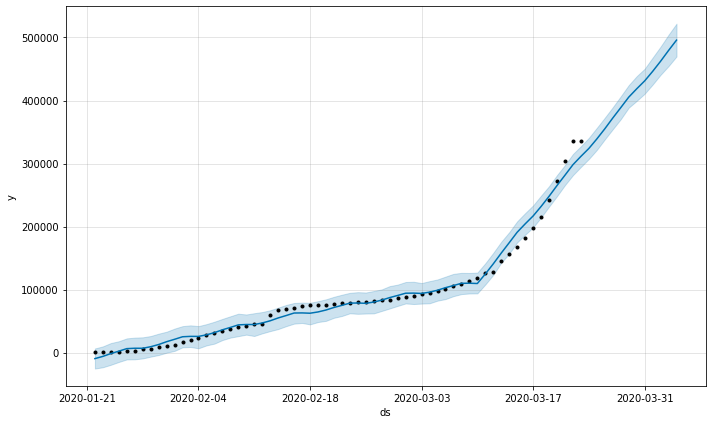

In [53]:
plot_forecast = model.plot(forecast)

In [54]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [55]:
model = Prophet(interval_width = 0.90)
model.fit(deaths)
future = model.make_future_dataframe(periods = 12)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04


In [56]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
69,2020-03-31,19092.799358,18154.633137,19994.150275
70,2020-04-01,19833.755830,18866.565958,20799.448723
71,2020-04-02,20542.408934,19544.901894,21556.835621
72,2020-04-03,21330.149015,20085.495544,22547.366951
73,2020-04-04,22137.436002,20924.462889,23400.570613


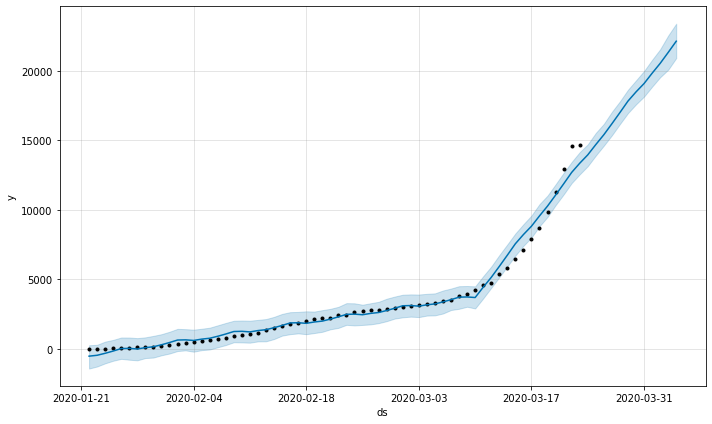

In [57]:
plot_forecast = model.plot(forecast)

In [58]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [59]:
model = Prophet(interval_width = 0.90)
model.fit(recovered)
future = model.make_future_dataframe(periods = 12)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04


In [60]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
69,2020-03-31,115320.793562,112711.578433,117758.793353
70,2020-04-01,117675.666962,114656.906767,120572.511612
71,2020-04-02,119918.998070,116435.363898,123239.131700
72,2020-04-03,122255.671296,118373.084362,126077.668661
73,2020-04-04,125173.957004,120665.465135,129535.792421


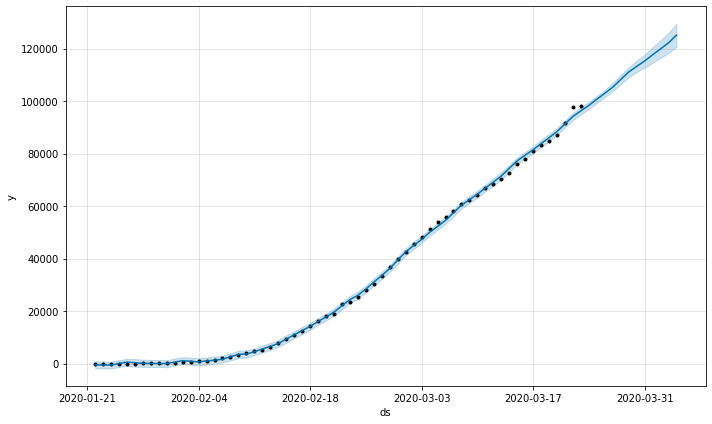

In [61]:
plot_forecast = model.plot(forecast)